# Сборный проект №1 - Анализ игровой индустрии с целью определения закономерностей для выпуска успешного продукта на рынок

# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Описание данных
- Name — название игры   
- Platform — платформа  
- Year_of_Release — год выпуска  
- Genre — жанр игры  
- NA_sales — продажи в Северной Америке (миллионы проданных копий)  
- EU_sales — продажи в Европе (миллионы проданных копий)  
- JP_sales — продажи в Японии (миллионы проданных копий)  
- Other_sales — продажи в других странах (миллионы проданных копий)  
- Critic_Score — оценка критиков (максимум 100)  
- User_Score — оценка пользователей (максимум 10)  
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.  

# План работы
***
- **Шаг 1**. Откройте файл с данными и изучите общую информацию  
Путь к файлу: /datasets/games.csv. Скачать датасет  
***
- **Шаг 2**. Подготовьте данные  
 - Замените названия столбцов (приведите к нижнему регистру);  
 - Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
 - Обработайте пропуски при необходимости:  
 - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
 - Опишите причины, которые могли привести к пропускам;  
 - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;  
 - Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  
 ***
- **Шаг 3**. Проведите исследовательский анализ данных  
 - Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
 - Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте  распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
 - Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
 - Не учитывайте в работе данные за предыдущие годы.  
 - Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
 - Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.  
 - Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
 - Соотнесите выводы с продажами игр на других платформах.  
 - Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  
 ***
- **Шаг 4**. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):  
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
 - Самые популярные жанры (топ-5). Поясните разницу.  
Влияет ли рейтинг ESRB на продажи в отдельном регионе?  
***
- **Шаг 5**. Проверьте гипотезы  
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  
Задайте самостоятельно пороговое значение alpha.  
Поясните:
 - Как вы сформулировали нулевую и альтернативную гипотезы;  
 - Какой критерий применили для проверки гипотез и почему.  
 ***
- **Шаг 6**. Напишите общий вывод
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter("ignore")

##  Откройте файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')

Откроем файл с данными.

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Изучим общую информацию. 

## Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower()

### Преобразуйте данные в нужные типы

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изучим типы данных. Предлагаю привести столбец 'year_of_release' к типу данных int (можно было бы использовать и todatetime, но в конкретно этом случае не вижу в этом смысла) и столбец 'user_score' типу данных float. Остальные столбцы содержат в себе верные типы данных.

In [6]:
data['year_of_release'] = data['year_of_release'].fillna(2099)
data['year_of_release'] = data['year_of_release'].astype('int')

Привели столбец 'year_of_release' к типу данных int, пропущенные значения заполнила выдуманным числом.

### Обработайте пропуски при необходимости

In [7]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Среди уникальных значений в столбце с оценкой пользователей встречаются пропуски 'nan' и интересная аббревиатура 'tbd', которую нам предложенно рассмореть подробнее. Открываем гугл и читаем что это такое: аббревиатура расшифровывается как "To Be Determined", то есть "Будет определено". То есть в нашем случае, оценка пользователей по играм не определена, значит ее нет, то есть можем заполнить эти значения 'nan' и привести столбец к типу данных float.

In [8]:
data['user_score'] = data['user_score'].replace('tbd','nan')
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Готово! С типами данных разобрались.

In [9]:
data.isna().sum().sort_values(ascending = False)

user_score         9125
critic_score       8578
rating             6766
name                  2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Посчитаем количество пропусков.

In [10]:
data.isna().sum().sort_values(ascending = False)/data.shape[0]*100

user_score         54.591684
critic_score       51.319174
rating             40.478612
name                0.011965
genre               0.011965
platform            0.000000
year_of_release     0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
dtype: float64

Посчитаем долю пропусков в процентах и отобразим в порядке убывания. В первых трех столбцах доля пропусков ооочень большая, около 50% от всех данных. Скорее всего, пропуски в столбцах 'user_score', 'critic_score' возникли по той причине, что многие игры были выпущены до того, как активно стала использоваться сеть Интернет и отзывы не публиковались в сети так активно, как сейчас. По поводу столбца 'rating ' можно сказать, что ESRB появилась только в 1994 году и поэтому игры, выпущенные до этого года остались без оценки.

In [11]:
data['rating'] = data['rating'].fillna('not determined')
data['user_score'] = data['user_score'].fillna(-9)
data['critic_score'] = data['critic_score'].fillna(-99)
data = data.dropna(subset=['name','genre'])

Пропущенные значения в столбце с рейтингом заменим на 'not determined' ('не определено'). Оценку пользователей и оценку критиков заполним случайно выбранными мною числами, этот способ считаю оптимальным в данной задаче, заполнение пропущенных значения нулями, медианой и средним исказит наше исследование. Удалим пропуски в имени и жанре, их очень мало и они нам не помогут сформировать рекомендации для проведения рекламной кампании.

In [12]:
data.isna().sum().sort_values(ascending = False)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

От пропусков избавились!

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец

In [13]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Посчитали суммарные продажи во всех регионах и добавили новый столбец.

In [14]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-99.0,-9.0,not determined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-99.0,-9.0,not determined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-99.0,-9.0,not determined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-99.0,-9.0,not determined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-99.0,-9.0,not determined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-99.0,-9.0,not determined,0.01


In [15]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  sum_sales        16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


**На этапе подготовки данных мною была выполнена:**
1) замена названий столбцов;  
2) поиск, замена и удаление пропущенных значений;  
3) изменение типов данных;  
4) рассчет нового параметра.

## Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы

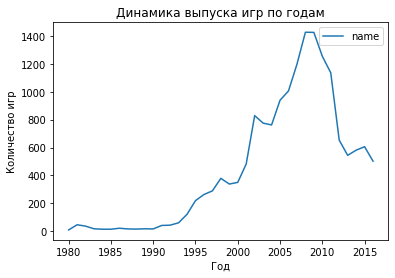

In [16]:
data_games_year = data.query('year_of_release !=2099').groupby('year_of_release').agg({'name':'count'})
data_games_year.plot();
plt.title('Динамика выпуска игр по годам');
plt.xlabel('Год');
plt.ylabel('Количество игр');

Построили график отображающий сколько игр выпускалось в разные годы. Здесь мы видим планомерный рост с 1990 до 2008 года, плато 2008-2009 и затем спад, связанный с активным внедрением мобильных устройств. В нашем исследовании данные за весь период не важны, т.к. они могут исказить прогноз на 2017 год.

### Посмотрите, как менялись продажи по платформам

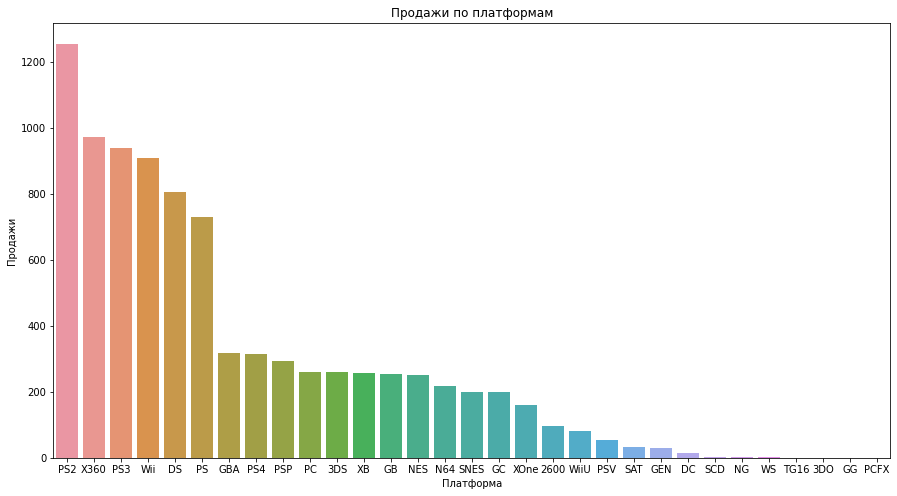

In [17]:
data_games_platform = data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc=['sum'])
data_games_platform.columns = ['sum']
data_games_platform = data_games_platform.sort_values('sum', ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(x=data_games_platform.index, y=data_games_platform['sum']);
plt.title('Продажи по платформам');
plt.xlabel('Платформа');
plt.ylabel('Продажи');

Построим гистограмму платформ с наибольшими суммарными продажами. Предлагаю рассмотреть ниже первые 6 платформ в распределении по годам. 

In [18]:
top_6 = data.query('platform == ["PS2", "X360", "PS3", "Wii", "DS", "PS"] and year_of_release !=2099 and year_of_release !=1985')

Создадим датафрейм с топ-6 платформ по суммарным продажам.

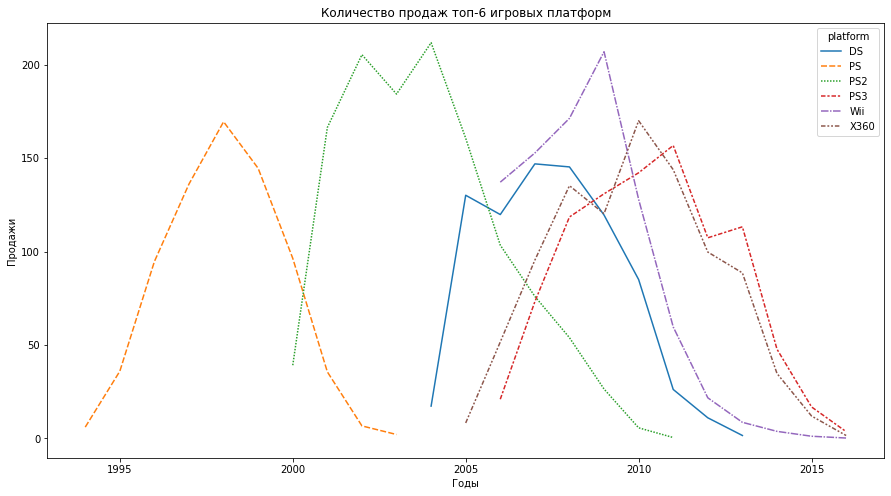

In [19]:
top_6_pivot=top_6.pivot_table(index='platform', columns = 'year_of_release', values = 'sum_sales', aggfunc = 'sum')
top_6_pivot = top_6_pivot.T
plt.figure(figsize=(15,8))
plt.title('Количество продаж топ-6 игровых платформ')
plt.xlabel('Годы')
plt.ylabel('Продажи')
sns.lineplot(data = top_6_pivot);

Построим распределение по годам. Характерный срок появления и исчезновения платформ около 10 лет.

In [20]:
data = data.query('year_of_release !=2099 and year_of_release > 2013')

Предлагаю к дальнейшему рассмотрению данные с 2014 года, они помогут построить нам наиболее актуальный прогноз. Возьмем данные за соответствующий актульный период, определенный в результате исследования предыдущих вопросов.

### Какие платформы лидируют по продажам, растут или падают?

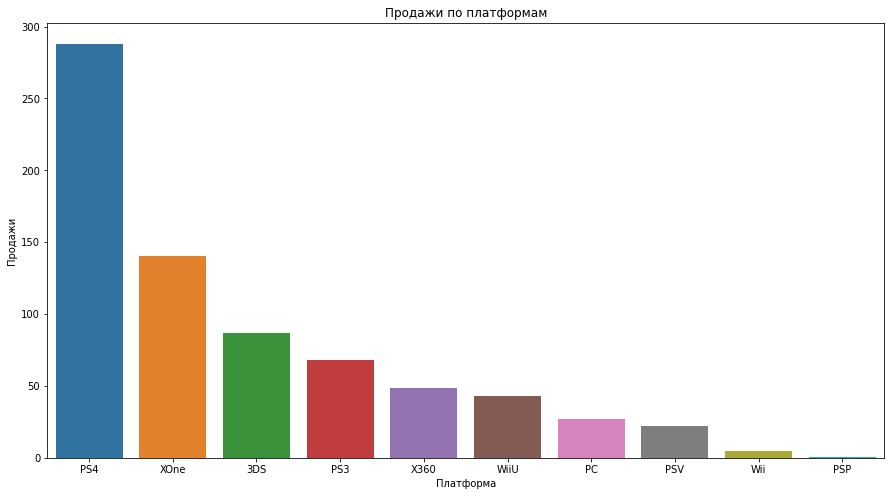

In [21]:
data_games_platform_actual = data.pivot_table(index = 'platform', values = 'sum_sales', aggfunc=['sum'])
data_games_platform_actual.columns = ['sum']
data_games_platform_actual = data_games_platform_actual.sort_values('sum', ascending = False)
plt.figure(figsize=(15,8))
sns.barplot(x=data_games_platform_actual.index, y=data_games_platform_actual['sum']);
plt.title('Продажи по платформам');
plt.xlabel('Платформа');
plt.ylabel('Продажи');

Построим гистограмму платформ с наибольшими суммарными продажами за соответствующий актуальный период. Среди лидеров PS4, XOne, 3DS, PS3, X360.

In [22]:
top_5 = data.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360"]')

Создадим датафрейм с топ-5 потенциально прибыльных платформ.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам

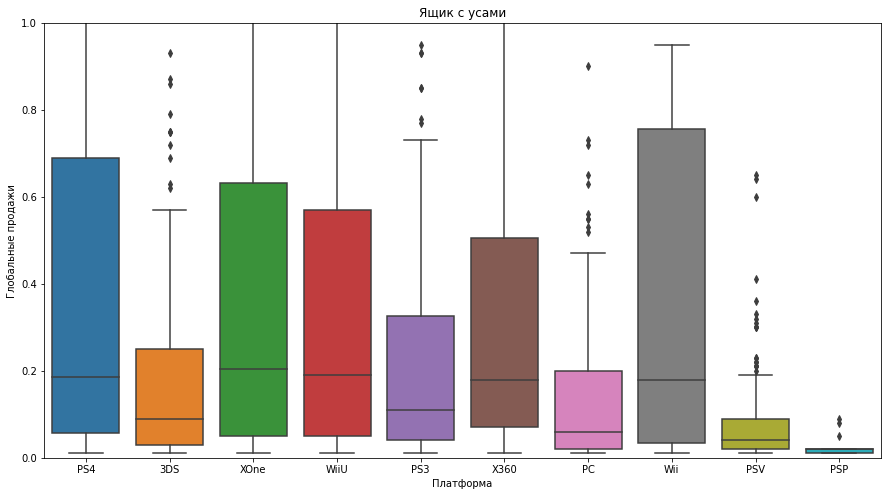

In [23]:
plt.figure(figsize=(15,8))
plt.ylim(0, 1.0);
sns.boxplot(data=data, x='platform', y='sum_sales');
plt.title('Ящик с усами')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

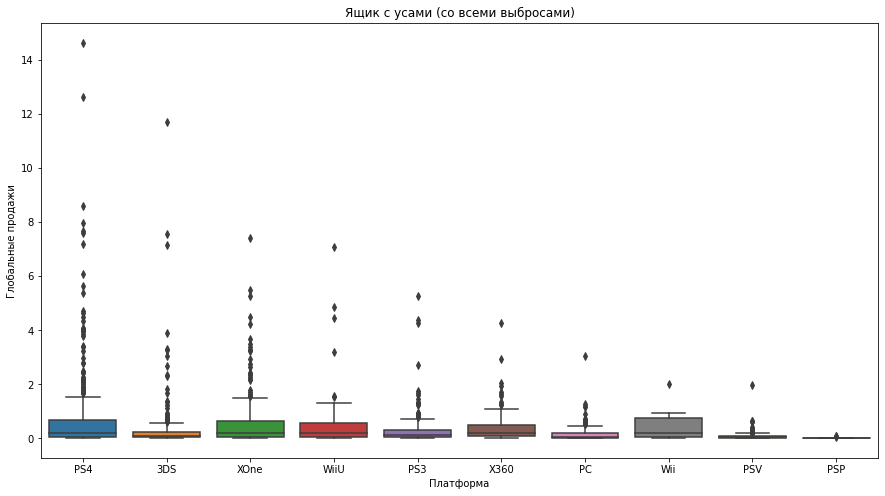

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='platform', y='sum_sales');
plt.title('Ящик с усами (со всеми выбросами)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи');

Построим "ящик с усами" по глобальным продажам игр в разбивке по платформам. Мы видим, что медиана у всех платформ находится на разном уровне, они активно конкурируют. Так же видим различие среди лидеров по глобальным продажам игр и лидеров по суммарным продажам игр. 

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

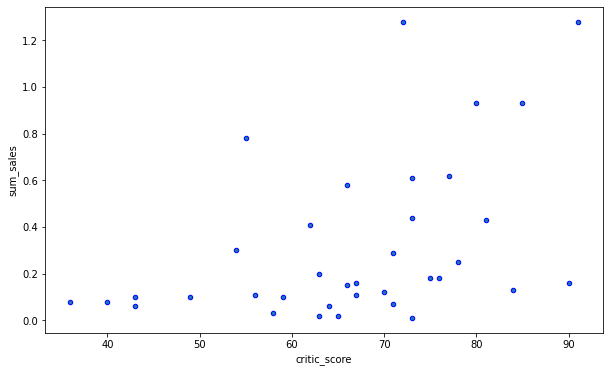

In [25]:
PS3=top_5[(top_5['platform']=='PS3')].query('user_score > 0 and critic_score > 0')
PS3.plot(kind='scatter', x='critic_score', y='sum_sales', ec='blue', figsize=(10,6));

In [26]:
corr_PS3 = (PS3['critic_score'].corr(PS3['sum_sales']))
corr_PS3

0.44657460493190704

Корреляция умеренная.

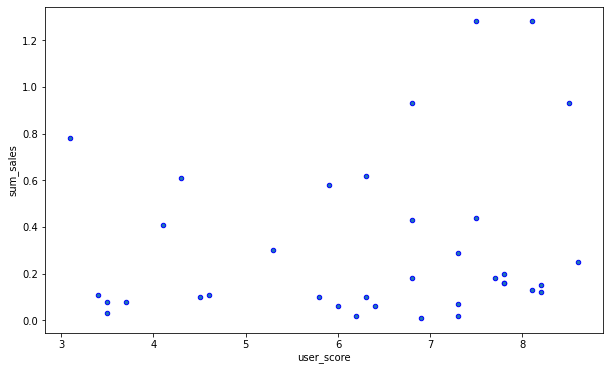

In [27]:
PS3.plot(kind='scatter', x='user_score', y='sum_sales', ec='blue', figsize=(10,6));

In [28]:
corr_PS3 = (PS3['user_score'].corr(PS3['sum_sales']))
corr_PS3

0.15659516181359956

Корреляция очень слабая.

### Соотнесите выводы с продажами игр на других платформах.

In [29]:
corr_chart = (top_5.groupby(['platform'])[['sum_sales','critic_score','user_score']].agg('corr'))
corr_chart

sum_sales  critic_score  user_score
platform                                                  
3DS      sum_sales      1.000000      0.041824    0.047012
         critic_score   0.041824      1.000000    0.869434
         user_score     0.047012      0.869434    1.000000
PS3      sum_sales      1.000000      0.011572    0.240417
         critic_score   0.011572      1.000000    0.508197
         user_score     0.240417      0.508197    1.000000
PS4      sum_sales      1.000000      0.166233    0.112372
         critic_score   0.166233      1.000000    0.931292
         user_score     0.112372      0.931292    1.000000
X360     sum_sales      1.000000     -0.022674    0.125585
         critic_score  -0.022674      1.000000    0.349487
         user_score     0.125585      0.349487    1.000000
XOne     sum_sales      1.000000      0.222996    0.121509
         critic_score   0.222996      1.000000    0.818159
         user_score     0.121509      0.818159    1.000000

Мы видим, что для одних платформ, выбранных нами ранее для исследования, важны отзывы критиков, для других - важны отзывы пользователей.

### Посмотрите на общее распределение игр по жанрам.

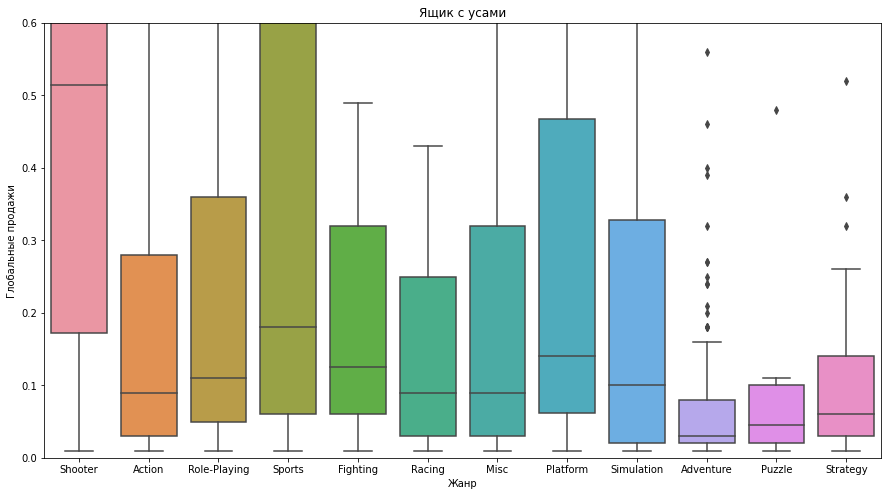

In [30]:
plt.figure(figsize=(15,8))
plt.ylim(0, 0.6);
sns.boxplot(data=data, x='genre', y='sum_sales');
plt.title('Ящик с усами')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи');

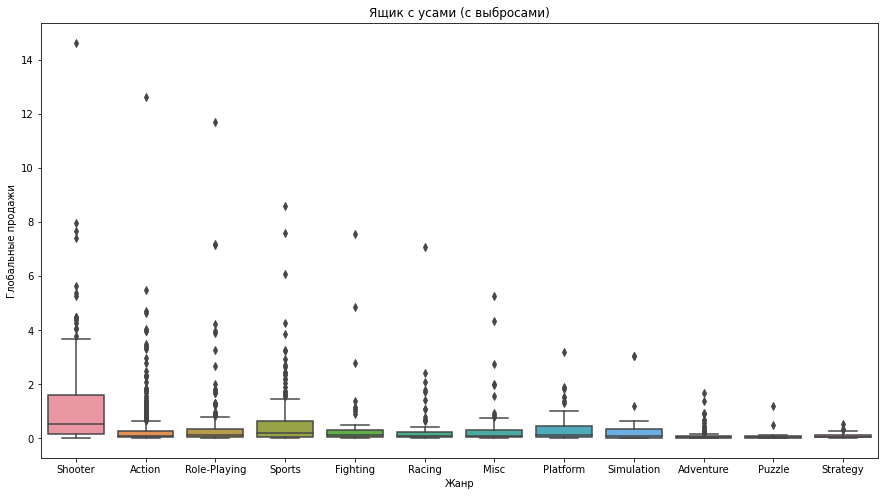

In [31]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, x='genre', y='sum_sales');
plt.title('Ящик с усами (с выбросами)')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи');

Лидерами среди жанровых предпочтений покупателей являются игры жанра Shooter и Sports. Замыкают рейтинг жанры игр Adventure и Puzzle.

**Вывод:**
1) количество выпускаемых игр до 2008 года планомерно росло, затем стремительно падало;  
2) жизненный цикл игровых платформ в среднем равен 10 годам, пик чаще всего наступает к середине жизненного цикла;  
3) лидерами по продажам в рассматриваемом нами актуальном периоде являются PS4, XOne, 3DS, PS3, X360;  
4) отзывы критиков, как и отзывы пользователей оказывают влияние на продажи в зависимости от платформы;    
5) самый популярный жанр игр - Shooter, непопулярный - Adventure .

In [32]:
data.year_of_release.unique()

array([2015, 2014, 2016])

## Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5)

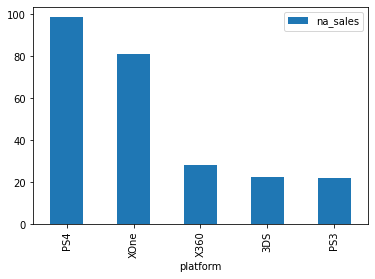

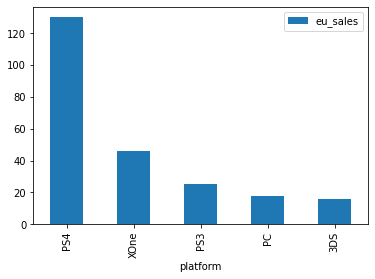

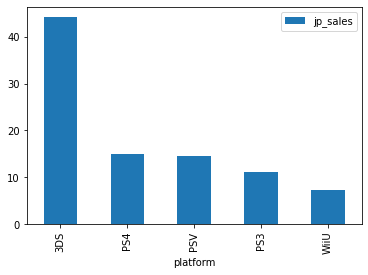

In [33]:
top_five_platform_NA = (data.groupby(by='platform').agg({'na_sales':'sum'})
                        .sort_values(by='na_sales', ascending=False).head().plot(kind = 'bar'));
top_five_platform_EU = (data.groupby(by='platform').agg({'eu_sales':'sum'})
                        .sort_values(by='eu_sales', ascending=False).head().plot(kind = 'bar'));
top_five_platform_JP = (data.groupby(by='platform').agg({'jp_sales':'sum'})
                        .sort_values(by='jp_sales', ascending=False).head().plot(kind = 'bar'));

Лидирующие платформы по регионам: 
- Северная Америка: PS4, XOne, X360, 3DS, PS3
- Европа: PS4, XOne, PS3, PC, 3DS
- Япония: 3DS, PS4, PSV, PS3, WiiU

### Самые популярные жанры (топ-5)

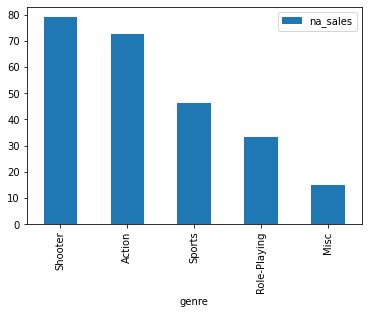

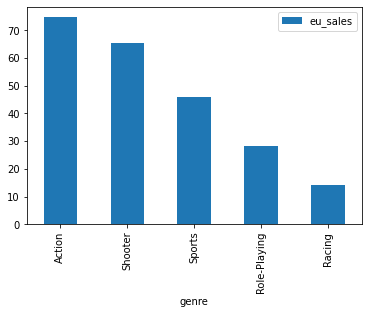

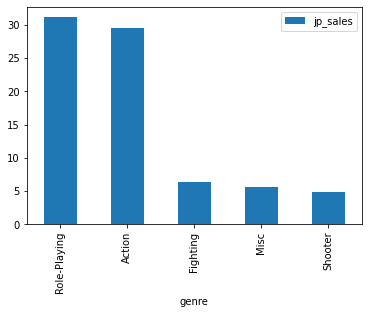

In [34]:
top_five_genre_NA = (data.groupby(by='genre').agg({'na_sales':'sum'})
                     .sort_values(by='na_sales', ascending=False).head().plot(kind = 'bar'));
top_five_genre_EU = (data.groupby(by='genre').agg({'eu_sales':'sum'})
                     .sort_values(by='eu_sales', ascending=False).head().plot(kind = 'bar'));
top_five_genre_JP = (data.groupby(by='genre').agg({'jp_sales':'sum'})
                     .sort_values(by='jp_sales', ascending=False).head().plot(kind = 'bar'));

Лидирующие жанры по регионам: 
- Северная Америка: Shooter, Action, Sports, Role-Playing, Misc
- Европа: Action, Shooter, Sports, Role-Playing, Racing
- Япония: Role-Playing, Action, Fighting, Misc, Shooter

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

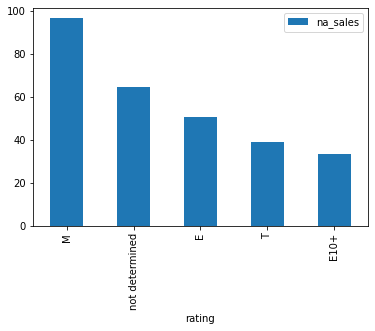

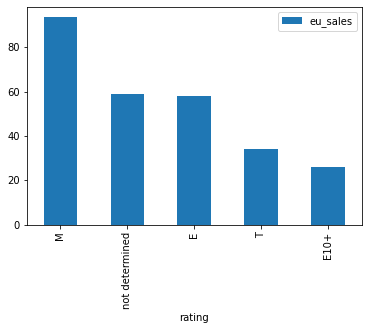

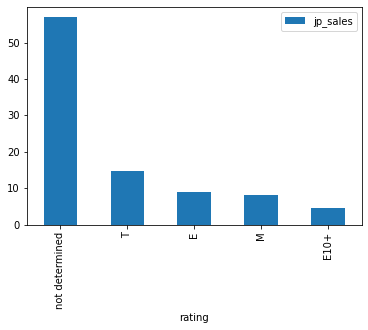

In [35]:
top_five_rating_NA = (data.groupby(by='rating').agg({'na_sales':'sum'})
                      .sort_values(by='na_sales', ascending=False).head().plot(kind = 'bar'));
top_five_rating_EU = (data.groupby(by='rating').agg({'eu_sales':'sum'})
                      .sort_values(by='eu_sales', ascending=False).head().plot(kind = 'bar'));
top_five_rating_JP = (data.groupby(by='rating').agg({'jp_sales':'sum'})
                      .sort_values(by='jp_sales', ascending=False).head().plot(kind = 'bar'));

Лидеры по возрастному рейтингу по регионам: 
- Северная Америка: M, not determined, E, T, E10+
- Европа: M, not determined, E, T, E10+
- Япония: not determined, T, E, M, E10+

Для пользователя из Северной америки:
- топ-5 лидирующих платформ: PS4, XOne, X360, 3DS, PS3 - снижение популярности от платформе к платформе происходит равномерно;
- топ-5 популярных жанров: Shooter, Action, Sports, Role-Playing, Misc;
- по возрастному рейтингу лидируют игры с маркировкой 'Подходит для лиц старше 17 лет', далее и популярность снижается согласно возрасту.

Для пользователя из Европы:
- топ-5 лидирующих платформ: PS4, XOne, PS3, PC, 3DS - при этом PS4 явный лидер с большим отрывом;
- топ-5 популярных жанров: Action, Shooter, Sport, Role-Playing, Racing;
- по возрастному рейтингу лидируют игры с маркировкой 'Подходит для лиц старше 17 лет', далее и популярность снижается согласно возрасту.

Для пользователя из Японии:
- топ-5 лидирующих платформ: 3DS, PS4, PSV, PS3, WiiU - при этом 3DS явный лидер с большим отрывом;
- топ-5 популярных жанров: Role-Playing, Action, Fighting, Misc, Shooter;
- по возрастному рейтингу лидируют игры с маркировкой 'Подходит для лиц старше 13 лет', далее 'Подходит для всех возрастных категорий' и только потом 'Подходит для лиц старше 17 лет'.

Рейтинг организации **ESRB**.

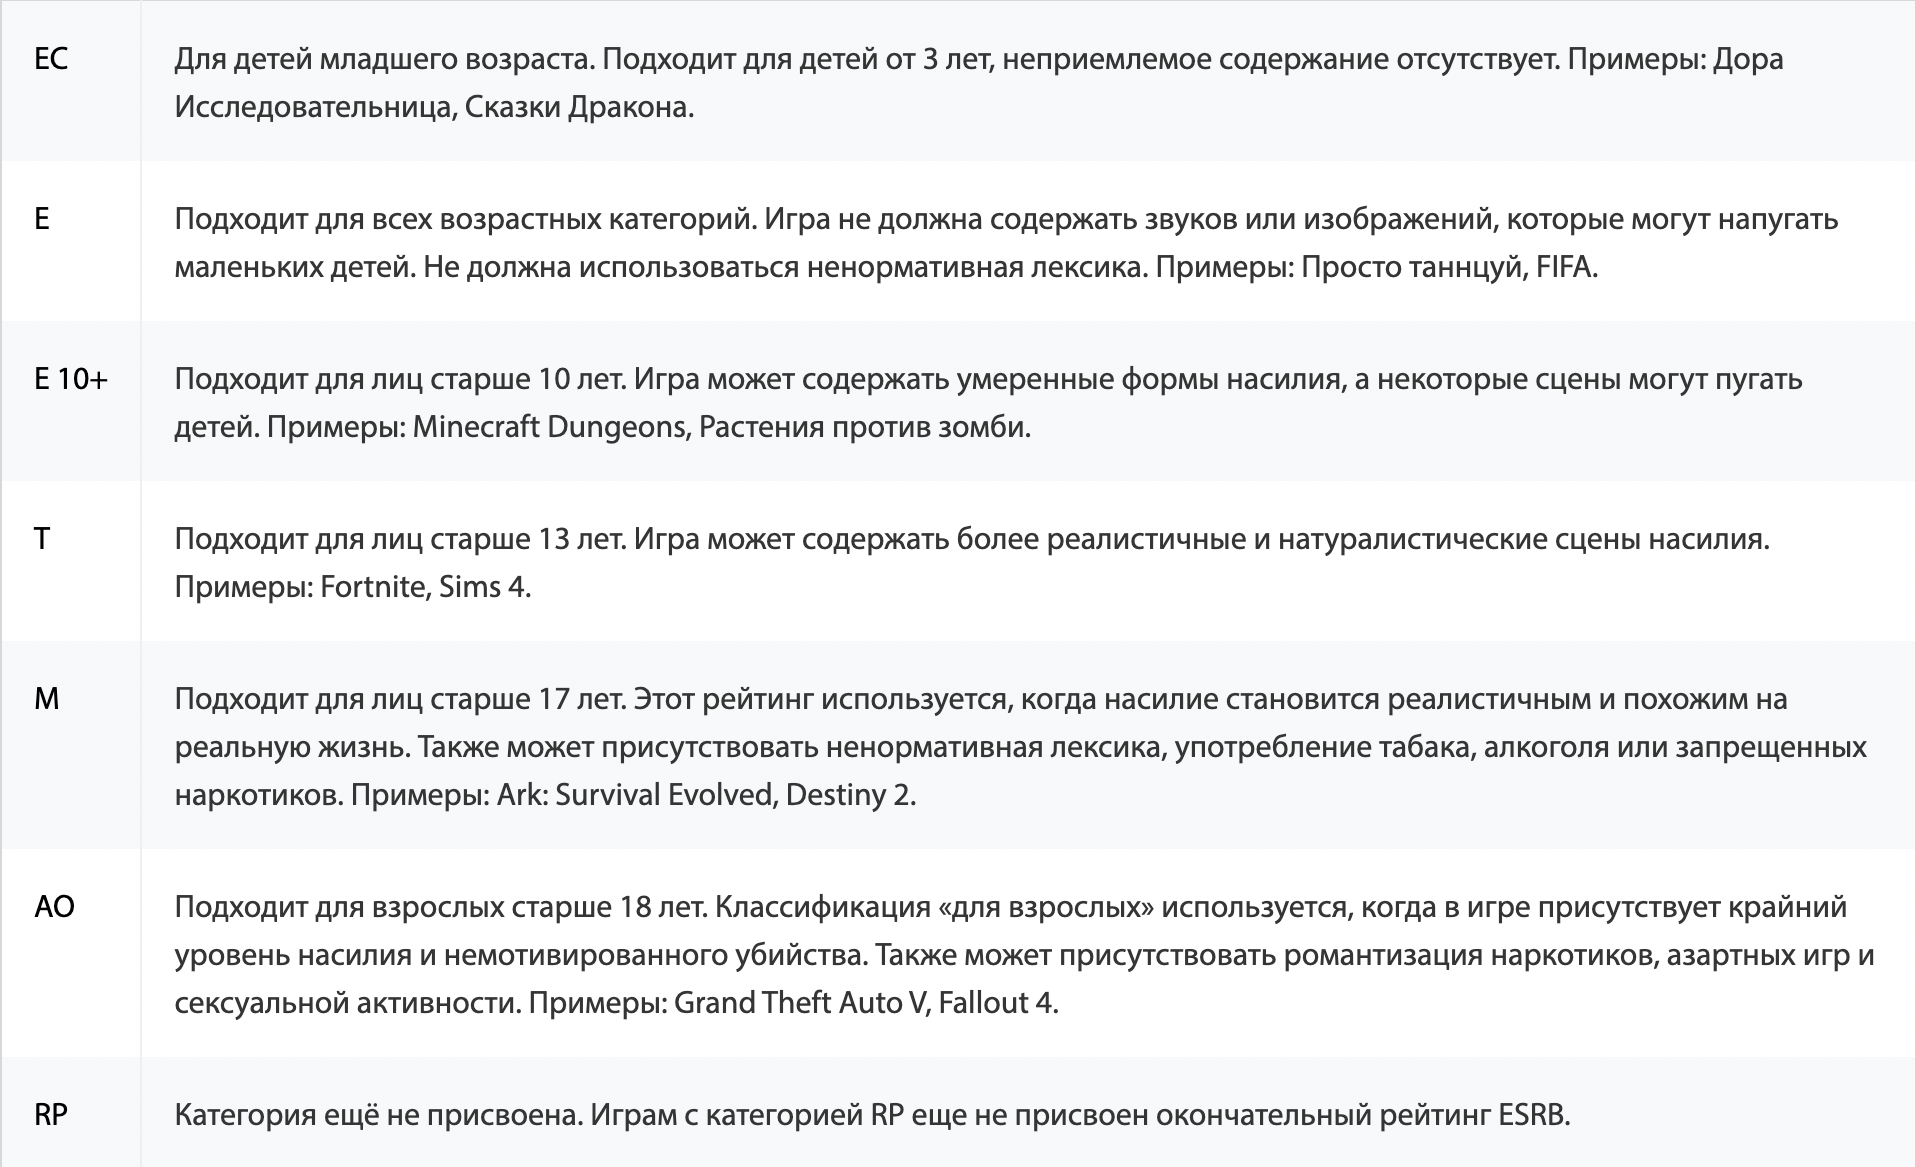

**Вывод:**
1) Предпочтения по платформам у жителей Северной Америки и европейцев схожи, японцы же предпочитают иные платформы;  
2) Игры жанра Action наиболее популярны среди рассматриваемых нами регионов;  
3) В Северной Америке и европе бОльшую популярность имеют игры для взрослых старше 17 лет, в Японии игры для лиц с возрастом поменьше - популярнее.  

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Расчитаем средние пользовательские рейтинги платформ XOne и PC.

In [36]:
XOne_user_score = data[(data['platform']=='XOne')].query('user_score > 0')['user_score']

In [37]:
XOne_user_score.mean()

6.594545454545456

In [38]:
PC_user_score = data[(data['platform']=='PC')].query('user_score > 0')['user_score']

In [39]:
PC_user_score.mean()

6.298360655737705

*Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;*

*Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются.*

In [40]:
alpha = .01

results = st.ttest_ind(XOne_user_score, PC_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


P-значение: 0.17882648263401307 - уровень значимости для этой статистики. Сравнивая его с критическим уровнем статистической значимости α, мы делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC равны.


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ  Xbox One и PC неодинаковы, с вероятностью в почти 11% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

In [41]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные

Расчитаем средние пользовательские рейтинги жанров Action и Sports.

In [42]:
action_user_score = data[(data['genre']=='Action')].query('user_score > 0')['user_score']

In [43]:
action_user_score.mean()

6.760606060606061

In [44]:
sports_user_score = data[(data['genre']=='Sports')].query('user_score > 0')['user_score']

In [45]:
sports_user_score.mean()

5.2251968503937

*Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;*
    
*Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.*

In [46]:
alpha = .01

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод:**

Средние пользовательские рейтинги платформ Xbox One и PC равны.

Средние пользовательские рейтинги жанров Action и Sports различаются.

## Напишите общий вывод

В ходе проделанной работы я изучила информацию из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах. 

Мною была выполнена предобработка данных: замена названий столбцов, поиск, замена и удаление пропущенных значений, изменение типов данных. Также был рассчитан новый параметр - суммарные продажи во всех регионах, который помог рассмотреть данные глобально.

В ходе проведения исследовательского анализа данных я изучала особенности игрового рынка, визуализировала данные путём построения различных графических представлений данных (линейных графиков, гистограмм, диаграмм рассеяния, диаграмм размаха).

Для каждого региона (NA, EU, JP) составлен пользовательский портрет, позволяющий выявить наиболее популярные платформы, жанры и возрастной рейтинг.

Также были проверены гипотезы о рейтингах платформ Xbox One и PC и рейтингах жанров рейтинги жанров Action и Sports.

Наблюдения после каждого шага описывала текстом в виде кратких пояснений. Каждый шаг исследования заканчивала кратким выводом.

**Итоговый вывод:**

Игровая индустрия стремительно развивалась с 1990 по 2008 год, затем начал происходить спад. Для нас важно было построить прогноз на 2017 год, поэтому я решила взять срез по данным с 2014 года, больший временной период мого сильно исказить результаты исследования. Тренды стремительно меняются, то что было популярно 10 лет назад сейчас теряет свою значимость и это не удивительно, ведь в ходе исследования мы обнаружили, что жизненный цикл платформы длится примерно 10 лет, а пик популярности достигается примерно на половине этого пути. Оценки критиков важны так же, как и оценки пользователей, в зависимости от выбранной для рассмотрени платформы. Среди лидеров по данным актуального периода платформы: PS4, PS3, XOne, 3DS, X360; и жанры Shooter и Sports. Рассмотрев пользовательские предпочтения более детально в разбивке по регионам, нам удалось определить лидирующие позиции по странам и найти пересечения в предпочтениях, которые помогут сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Необходимо продвигать продукт корпорации Sony, а именно PS4 - эта игровая консоль является фаворитом среди пользователей выбранных нами для исследования регионов. При этом делать ставку на игры жанра Shooter - этот жанр наиболее любим среди игроков. Касательно возрастного рейтинга (организации ESRB), производить игры с маркировкой 'Подходит для лиц старше 17 лет'.
